<a href="https://colab.research.google.com/github/yeonghun00/market-risk/blob/main/Risk%20Measurement%20Tools%20%3A%20(VaR%2C%20ES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas numpy matplotlib
!pip install arch

### **Fetching Data**

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()  # Calculate daily returns
    return stock_data

# Example: Apple stock
ticker = "AAPL"
start_date = "2023-09-15"
end_date = "2024-09-15"

# Fetch data
stock_data = fetch_data(ticker, start_date, end_date)
stock_data = stock_data.dropna()  # Drop rows with NaN values
returns = stock_data['Returns']

[*********************100%***********************]  1 of 1 completed


### **Risk Measurement Tools: Value at Risk (VaR) and Expected Shortfall (ES)**

In this section, we implement two commonly used market risk measurement tools: **Value at Risk (VaR)** and **Expected Shortfall (ES)**. These tools help assess the potential loss in a portfolio based on historical price data, providing insights into the risk level during adverse market conditions.

#### **1. Value at Risk (VaR)**

**Value at Risk (VaR)** is a statistical technique used to measure the potential loss in an asset or portfolio over a specified time period with a given confidence level. For example, a VaR at the 95% confidence level means that we can expect the portfolio to lose more than the VaR value only 5% of the time.

Mathematically, **VaR** can be represented as:

$ \text{VaR}_{\alpha} = \inf \left\{ x \in \mathbb{R} : P(L > x) \leq 1 - \alpha \right\} $

Where:
- $\alpha$ is the **confidence level** (e.g., 95% or 99%),
- $L$ is the **loss** distribution of the portfolio,
- $\text{VaR}_{\alpha}$ is the threshold loss such that the probability of exceeding this loss is $1 - \alpha$.

In simpler terms, $\text{VaR}_{\alpha}$ represents the maximum potential loss with a probability of $1 - \alpha$ over a given time horizon.

#### **2. Expected Shortfall (ES)**

**Expected Shortfall (ES)**, also known as **Conditional VaR (CVaR)**, takes the analysis one step further by calculating the **average loss** in the worst-case scenarios, i.e., those scenarios where the loss exceeds the VaR threshold. It provides a more accurate estimate of extreme losses during market downturns.

Mathematically, **ES** is defined as:

$ \text{ES}_{\alpha} = E[L | L > \text{VaR}_{\alpha}] $

Where:
- $\text{ES}_{\alpha}$ is the expected shortfall at the confidence level $\alpha$,
- $L$ is the **loss** distribution of the portfolio,
- $E[L | L > \text{VaR}_{\alpha}]$ represents the **expected value** of the loss $L$ given that the loss exceeds the VaR threshold.

In simpler terms, **ES** calculates the average loss in the worst-case $1 - \alpha$ scenarios, giving a more comprehensive view of potential extreme risks compared to VaR.


Value at Risk (VaR) at 95.0% confidence: -0.0213
Expected Shortfall (ES) beyond VaR: -0.0288


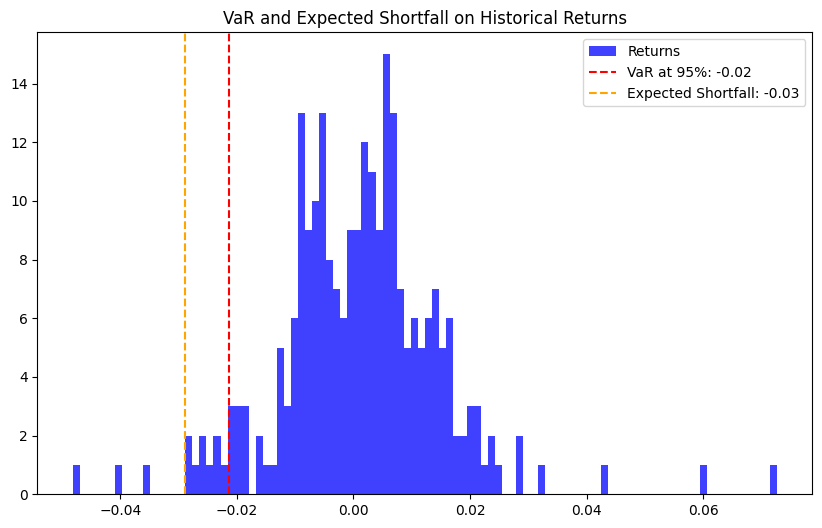

In [3]:

def calculate_var(returns, confidence_level=0.95):
    """Calculate the Value at Risk (VaR) at the specified confidence level."""
    var_value = np.percentile(returns.dropna(), (1 - confidence_level) * 100)
    return var_value

def calculate_es(returns, var_value):
    """Calculate the Expected Shortfall (ES), which is the average loss beyond the VaR threshold."""
    worst_losses = returns[returns <= var_value]
    return worst_losses.mean()

def plot_var_es(returns, var_value, es_value):
    plt.figure(figsize=(10, 6))
    plt.hist(returns.dropna(), bins=100, alpha=0.75, color='blue', label='Returns')
    plt.axvline(var_value, color='red', linestyle='--', label=f'VaR at 95%: {var_value:.2f}')
    plt.axvline(es_value, color='orange', linestyle='--', label=f'Expected Shortfall: {es_value:.2f}')
    plt.title("VaR and Expected Shortfall on Historical Returns")
    plt.legend()
    plt.show()

# Parameters for analysis
confidence_level = 0.95  # 95% confidence level

# Calculate VaR and Expected Shortfall
var_value = calculate_var(returns, confidence_level)
es_value = calculate_es(returns, var_value)

# Output the results
print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence: {var_value:.4f}")
# This means that, with 95% confidence, the maximum potential daily loss is x.xx% of the portfolio's value.

print(f"Expected Shortfall (ES) beyond VaR: {es_value:.4f}")
# This means that, if the loss exceeds x.xx% (VaR), the average loss is expected to be y.yy%

# Plot VaR and ES
plot_var_es(returns, var_value, es_value)


### **Value at Risk (VaR) and Expected Shortfall (ES) Backtesting**

Additionally, we backtest the calculated VaR and ES by comparing them with actual historical returns to see if the model accurately predicts extreme losses.



Value at Risk (VaR) at 95.0% confidence: -0.0213
Expected Shortfall (ES) beyond VaR: -0.0288
Number of VaR violations: 13
Violation rate: 5.2000% (expected rate: 5.0000%)
Expected Shortfall (ES) from model: -0.0288
Actual ES (average loss beyond VaR): -0.0288


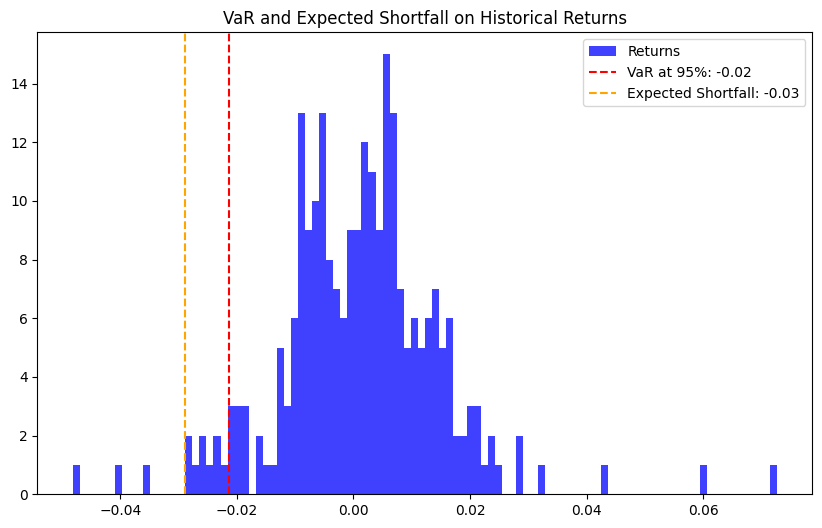

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    var_value = np.percentile(returns.dropna(), (1 - confidence_level) * 100)
    return var_value

# Function to calculate Expected Shortfall (ES)
def calculate_es(returns, var_value):
    worst_losses = returns[returns <= var_value]
    return worst_losses.mean()

# Function to backtest VaR and ES
def backtest_var_es(returns, var_value, es_value):
    # Calculate violations where actual returns are below the VaR
    violations = returns[returns < var_value]

    # Count the number of VaR violations
    num_violations = len(violations)
    total_days = len(returns.dropna())
    violation_rate = num_violations / total_days

    # Calculate the average loss beyond VaR (for ES backtesting)
    actual_es = violations.mean() if num_violations > 0 else np.nan

    print(f"Number of VaR violations: {num_violations}")
    print(f"Violation rate: {violation_rate:.4%} (expected rate: {1 - confidence_level:.4%})")

    # Backtesting ES
    print(f"Expected Shortfall (ES) from model: {es_value:.4f}")
    print(f"Actual ES (average loss beyond VaR): {actual_es:.4f}")

# Plotting function for VaR and ES
def plot_var_es(returns, var_value, es_value):
    plt.figure(figsize=(10, 6))
    plt.hist(returns.dropna(), bins=100, alpha=0.75, color='blue', label='Returns')
    plt.axvline(var_value, color='red', linestyle='--', label=f'VaR at 95%: {var_value:.2f}')
    plt.axvline(es_value, color='orange', linestyle='--', label=f'Expected Shortfall: {es_value:.2f}')
    plt.title("VaR and Expected Shortfall on Historical Returns")
    plt.legend()
    plt.show()

# Parameters for analysis
confidence_level = 0.95  # 95% confidence level

# Calculate VaR and ES
var_value = calculate_var(returns, confidence_level)
es_value = calculate_es(returns, var_value)

# Output the results
print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence: {var_value:.4f}")
print(f"Expected Shortfall (ES) beyond VaR: {es_value:.4f}")

# Backtest VaR and ES
backtest_var_es(returns, var_value, es_value)

# Plot VaR and ES
plot_var_es(returns, var_value, es_value)


### **Stress Testing with Increased Volatility or Decreased Returns**

In this section, we implement a stress testing technique by modifying the historical returns of a portfolio. Stress testing helps simulate adverse market conditions by applying **shocks** to either the **volatility** or the **mean return** of the portfolio. We then recalculate the **Value at Risk (VaR)** and **Expected Shortfall (ES)** under these stressed conditions to evaluate how the portfolio performs in extreme scenarios.

Stress testing allows us to analyze the resilience of a portfolio by assuming market conditions that are more volatile than the norm, or by simulating poor market performance.

#### **1. Simulating Stressed Returns**

To simulate stressed returns, we apply two common adjustments:
- **Increased Volatility:** This shock increases the volatility of returns by a specified factor (e.g., a 50% increase in volatility).
- **Shift in Mean Return:** This shock decreases the average returns by a specified amount (e.g., a 1% reduction in mean return), which represents adverse market conditions.

The stressed returns are calculated as follows:

$ \text{Stressed Returns} = (\text{Returns} - \text{Mean Returns}) \times \text{Shock Volatility Factor} + \text{Mean Returns} + \text{Shock Mean Shift} $

Where:
- **Shock Volatility Factor** increases or decreases the volatility (e.g., a factor of 1.5 increases volatility by 50%).
- **Shock Mean Shift** shifts the mean of the returns to simulate worse performance (e.g., -0.01 reduces mean returns by 1%).

#### **2. Stressed Value at Risk (VaR)**

Once we have the stressed returns, we can recalculate **Value at Risk (VaR)** at a specified confidence level (e.g., 95%). The formula for VaR remains the same:

$ \text{VaR}_{\alpha} = \inf \left\{ x \in \mathbb{R} : P(L > x) \leq 1 - \alpha \right\} $

However, now we apply it to the **stressed returns** instead of the original returns. This allows us to see how the potential loss changes under extreme market conditions.

#### **3. Stressed Expected Shortfall (ES)**

Similarly, we recalculate **Expected Shortfall (ES)**, also known as **Conditional VaR (CVaR)**, using the stressed returns. The formula remains:

$ \text{ES}_{\alpha} = E[L | L > \text{VaR}_{\alpha}] $

This tells us the **average loss** in the worst-case scenarios, given the stressed returns. The stressed ES provides a better understanding of how the portfolio might behave in more extreme situations.


Stressed Value at Risk (VaR) at 95.0% confidence: -0.0425
Stressed Expected Shortfall (ES) beyond VaR: -0.0537


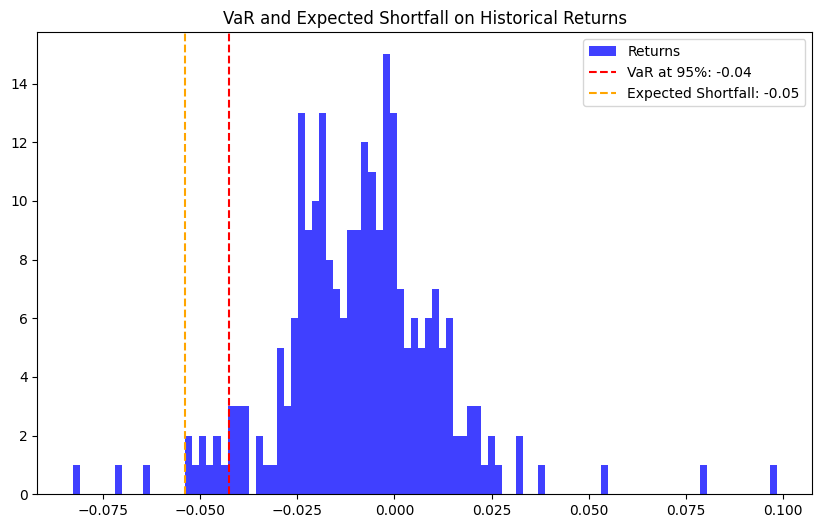

In [5]:
# Apply stress testing
shock_volatility_factor = 1.5  # Increase volatility by 50%
shock_mean_shift = -0.01  # Shift mean return down by 1%

# Stress Testing with Increased Volatility or Decreased Returns
def stress_test_var_es(returns, shock_volatility_factor=1.5, shock_mean_shift=-0.01, confidence_level=0.95):
    """Applies stress to the returns by increasing volatility or shifting the mean, and recalculates VaR and ES."""

    # Simulate stressed returns by increasing volatility and shifting mean
    stressed_returns = (returns - returns.mean()) * shock_volatility_factor + returns.mean() + shock_mean_shift

    # Calculate VaR and ES for stressed returns
    var_value_stressed = calculate_var(stressed_returns, confidence_level)
    es_value_stressed = calculate_es(stressed_returns, var_value_stressed)

    return var_value_stressed, es_value_stressed, stressed_returns

var_value_stressed, es_value_stressed, stressed_returns = stress_test_var_es(returns, shock_volatility_factor, shock_mean_shift, confidence_level)

# Output stressed results
print(f"Stressed Value at Risk (VaR) at {confidence_level * 100}% confidence: {var_value_stressed:.4f}")
print(f"Stressed Expected Shortfall (ES) beyond VaR: {es_value_stressed:.4f}")

# Plot the stressed VaR and ES
plot_var_es(stressed_returns, var_value_stressed, es_value_stressed)
